In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset
data = pd.read_csv('/content/Accounts.csv', engine='python', error_bad_lines=False)

# Split into groups
bot_data = data[data['Class'] == 1]
human_data = data[data['Class'] == 0]

# Significance level
alpha = 0.05

significant_features = []
non_significant_features = []

for feature_name in data.columns[1:45]:
    feature_human = human_data[feature_name]
    feature_bot = bot_data[feature_name]

    # Mann-Whitney test
    _, p_value = stats.mannwhitneyu(feature_human, feature_bot)

    if p_value <= alpha:
        significant_features.append((feature_name, p_value))
    else:
        non_significant_features.append(feature_name)

# Print significant features
for feature_info in significant_features:
    feature_name, p_value = feature_info
    print(f"Feature {feature_name}:")
    print(f"P-value: {p_value}")

# Save relevant significant features to a CSV file
result_df = pd.DataFrame(significant_features, columns=['Feature', 'P-value'])
result_df.to_csv('/content/FeaturesResults.csv', index=False)


<ipython-input-1-fd8b420c4d15>:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('/content/Accounts.csv', engine='python', error_bad_lines=False)


Feature NumberOfTotalCharactersMean:
P-value: 1.1153472309994572e-44
Feature  NumberOfTotalCharactersStd:
P-value: 0.0
Feature  NumberOfUppercaseCharactersMean:
P-value: 0.0
Feature NumberOfUppercaseCharactersStd:
P-value: 0.0
Feature  NumberOfLowercaseCharactersMean:
P-value: 1.013974894697687e-180
Feature NumberOfLowercaseCharactersStd:
P-value: 0.0
Feature  NumberOfSpecialCharactersStd:
P-value: 0.0
Feature  NumberOfNumbersMean:
P-value: 7.562939695697818e-289
Feature  NumberOfNumbersStd:
P-value: 0.0
Feature  NumberOfBlanksMean:
P-value: 5.584849464851882e-10
Feature  NumberOfBlanksStd:
P-value: 0.0
Feature  NumberOfWordsMean:
P-value: 0.0001449594126573137
Feature  NumberOfWordsStd:
P-value: 0.0
Feature  AverageLengthOfWordsMean:
P-value: 2.746407352527085e-271
Feature AverageLengthOfWordsStd:
P-value: 0.0
Feature  NumberOfPropositionsMean:
P-value: 0.0
Feature  NumberOfPropositionsStd:
P-value: 8.137831956296937e-117
Feature  AverageLengthOfPropositionsMean:
P-value: 0.0
Feature 

In [2]:
print("Non-Significant Features:\n")
for feature_name in non_significant_features:
    print(f"{feature_name}")

Non-Significant Features:

 NumberOfSpecialCharactersMean


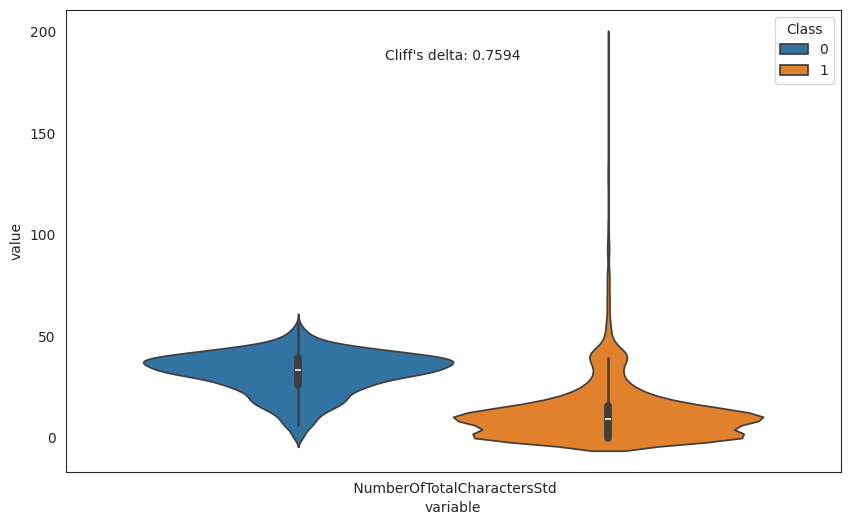

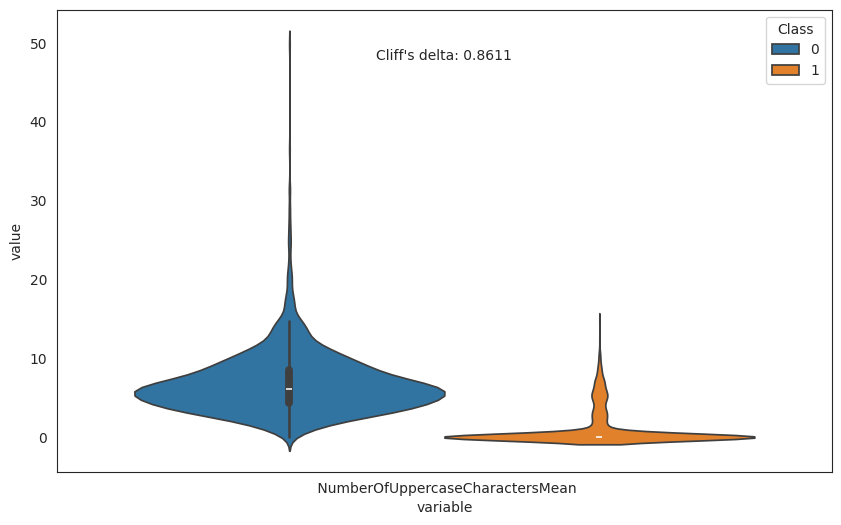

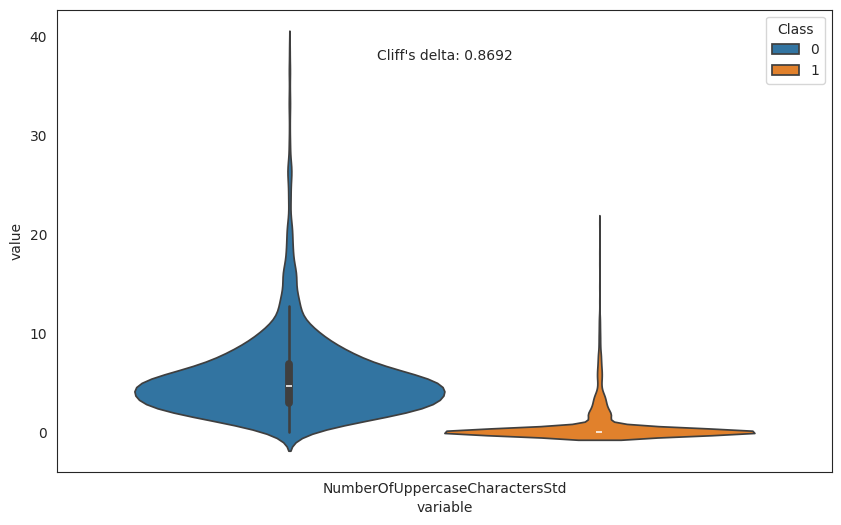

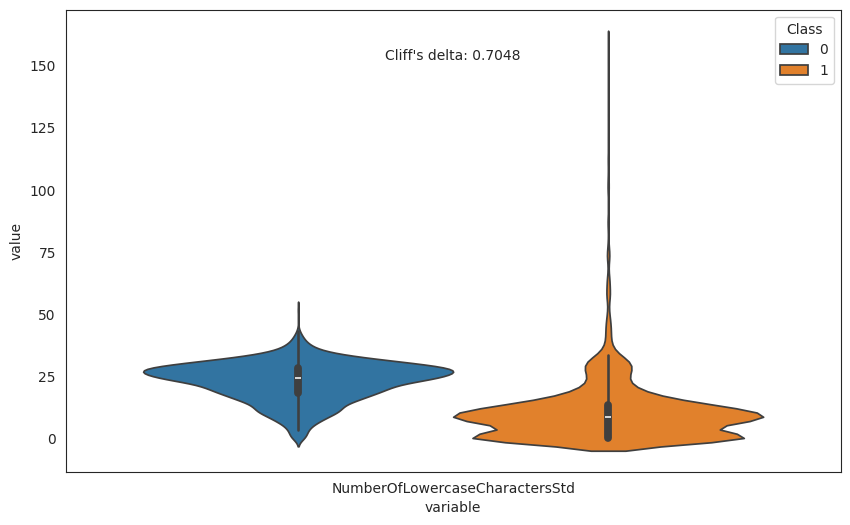

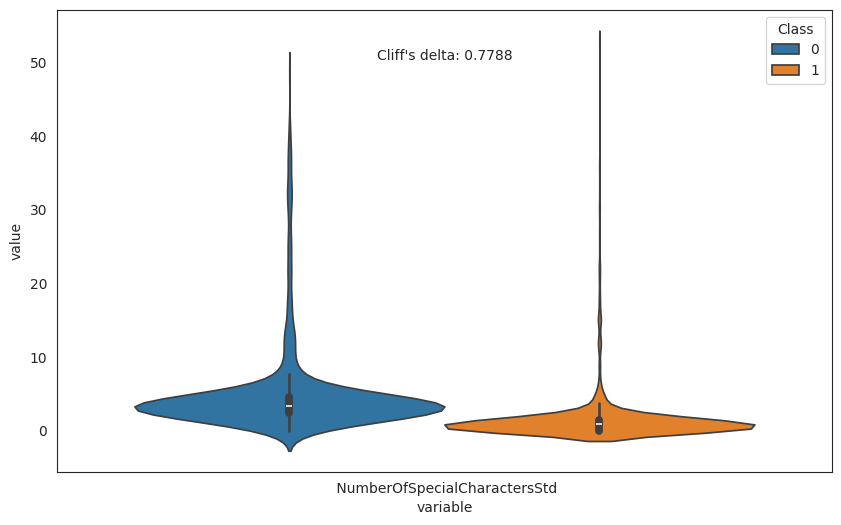

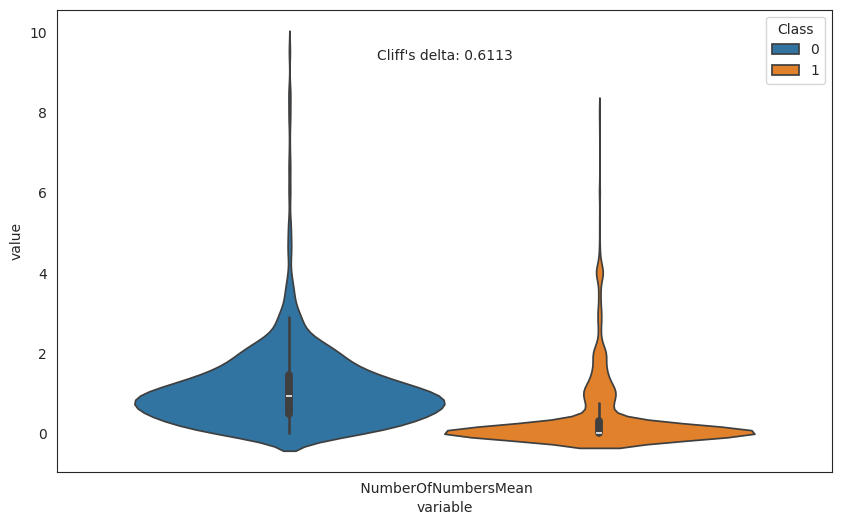

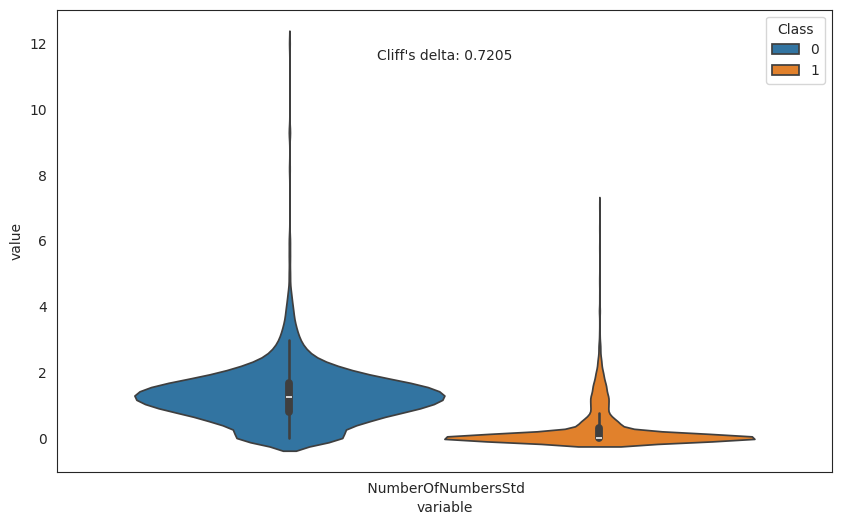

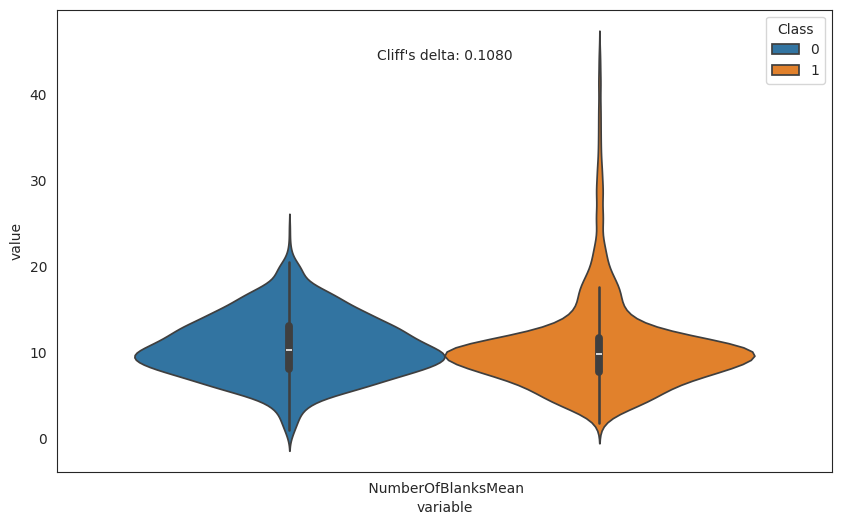

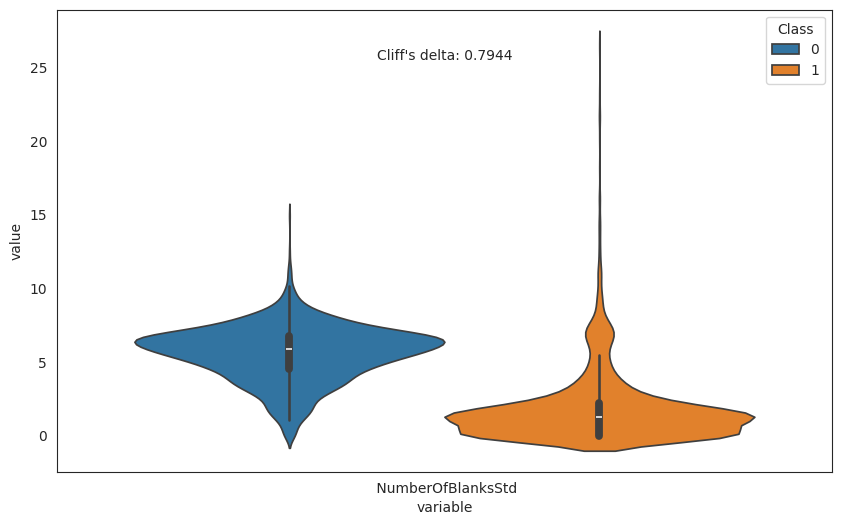

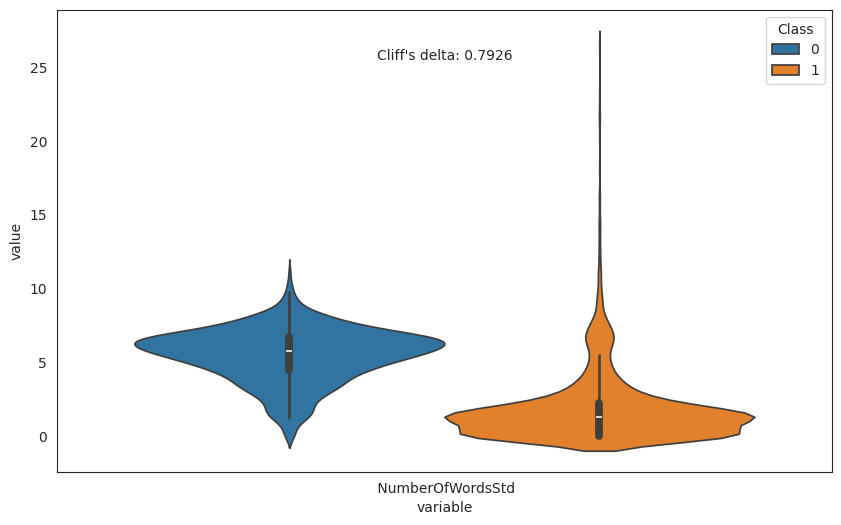

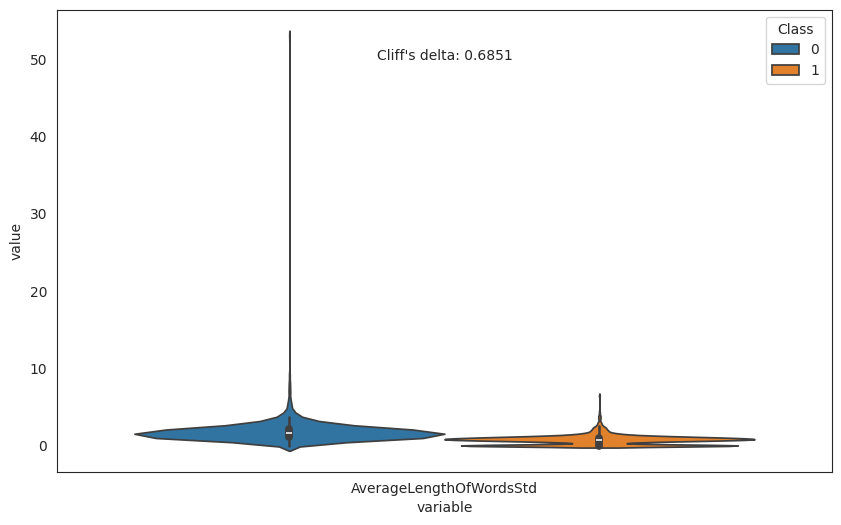

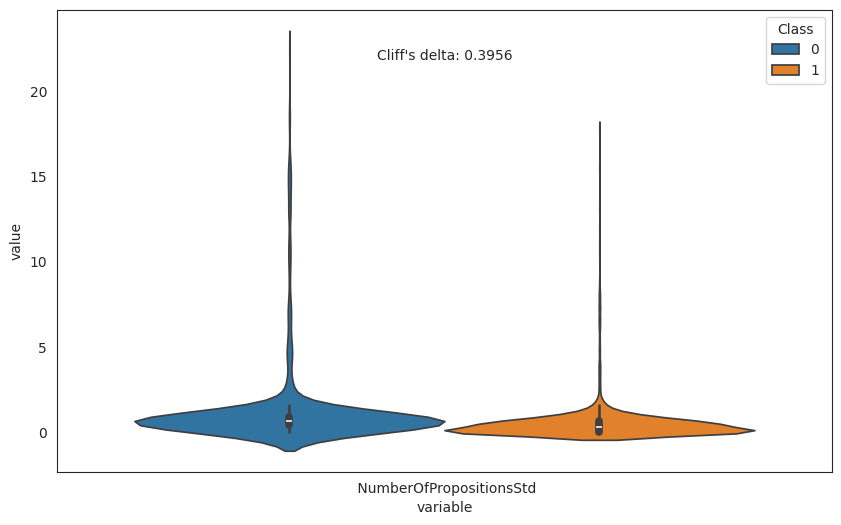

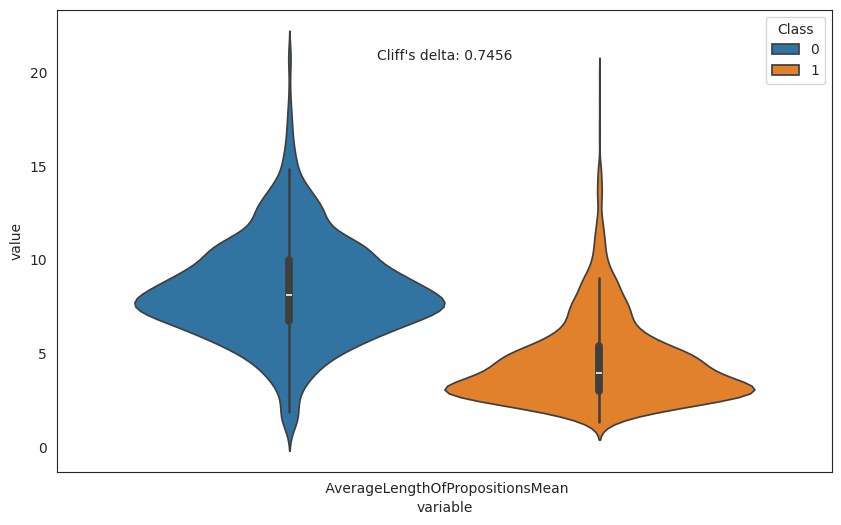

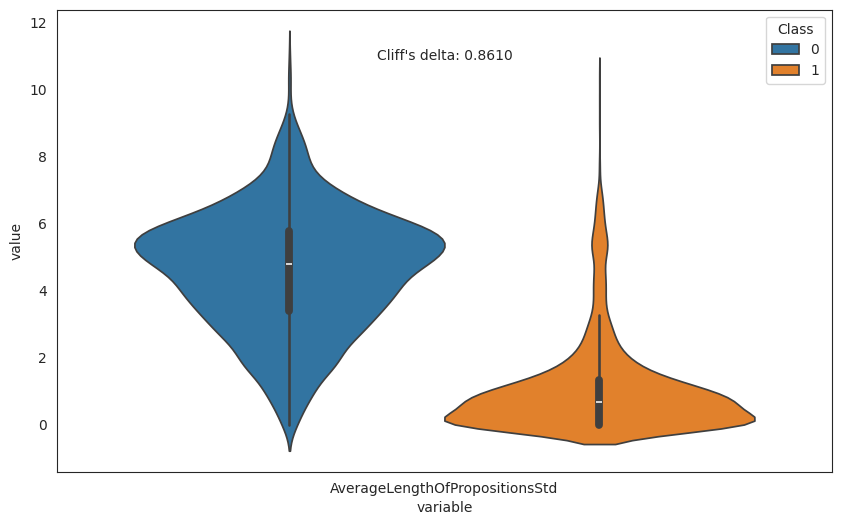

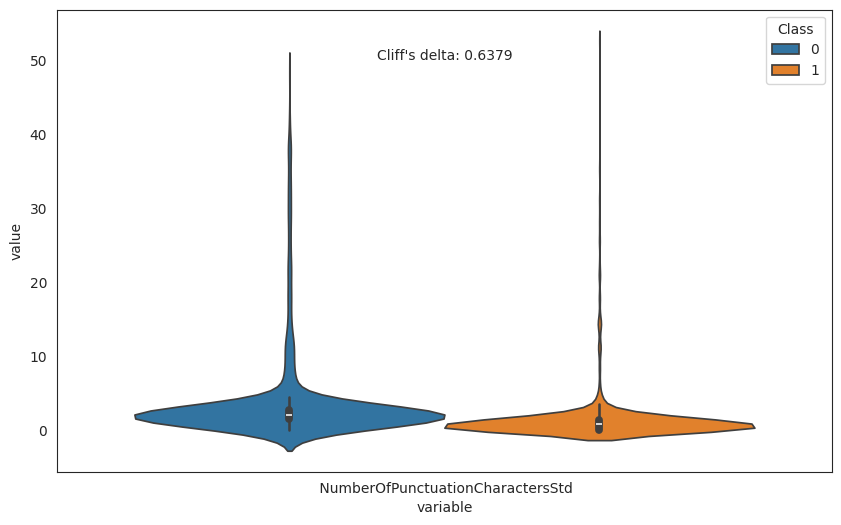

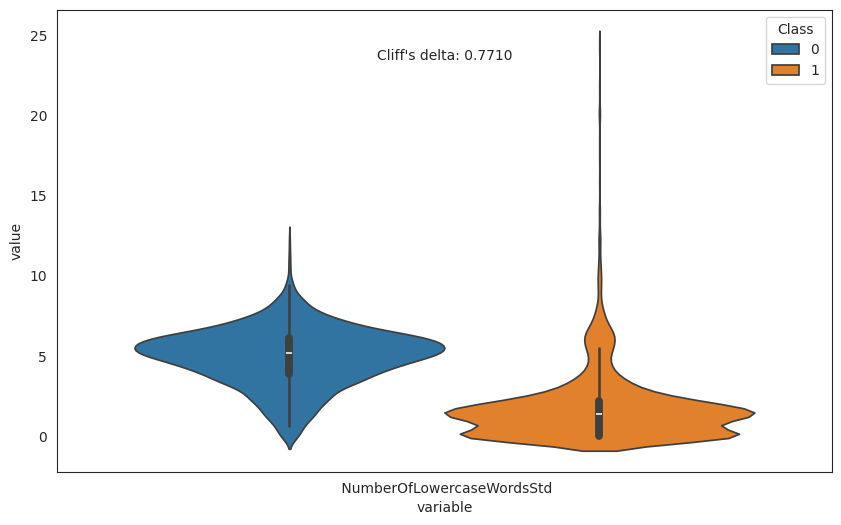

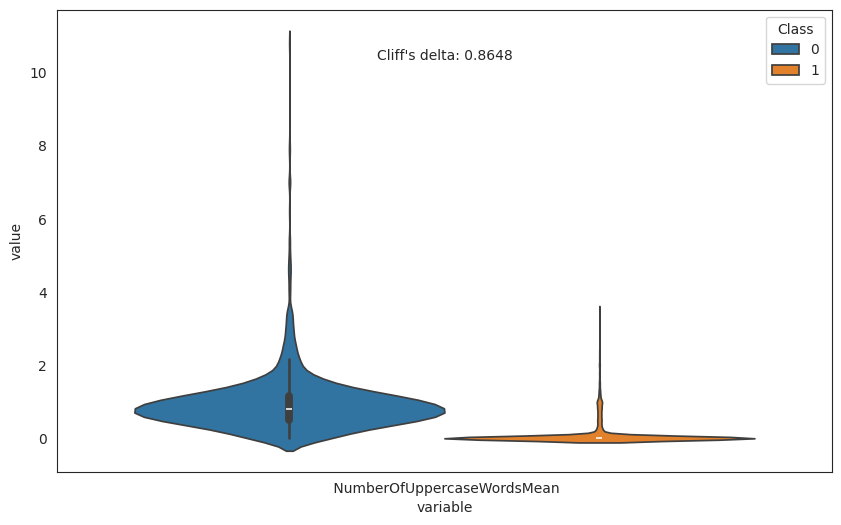

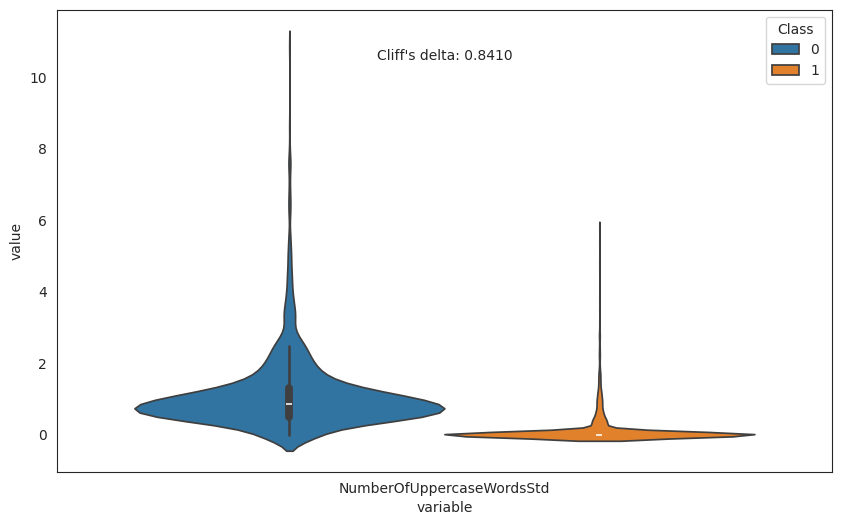

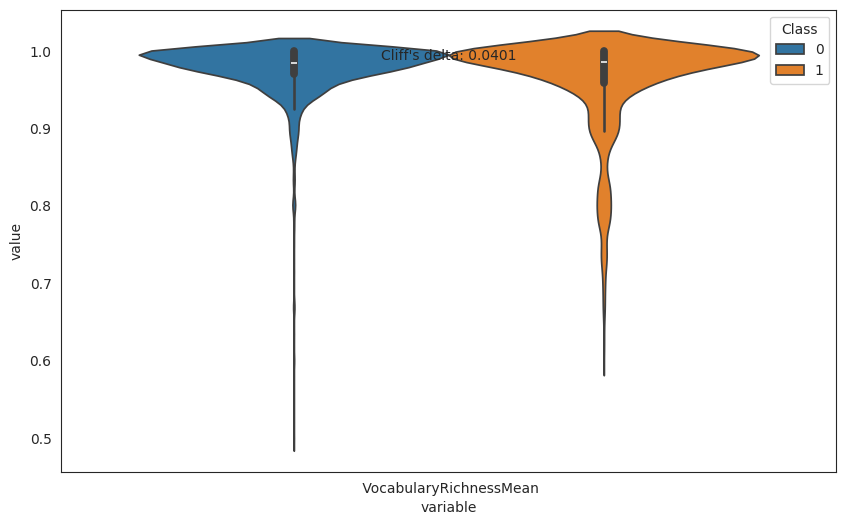

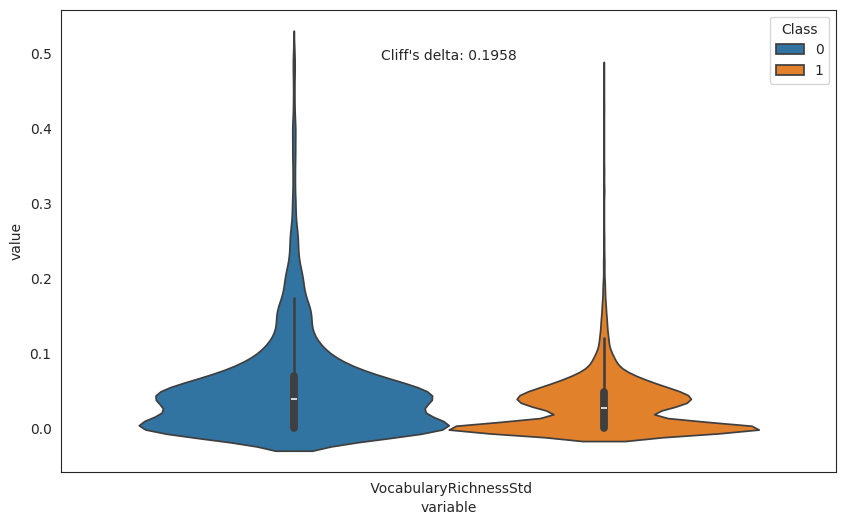

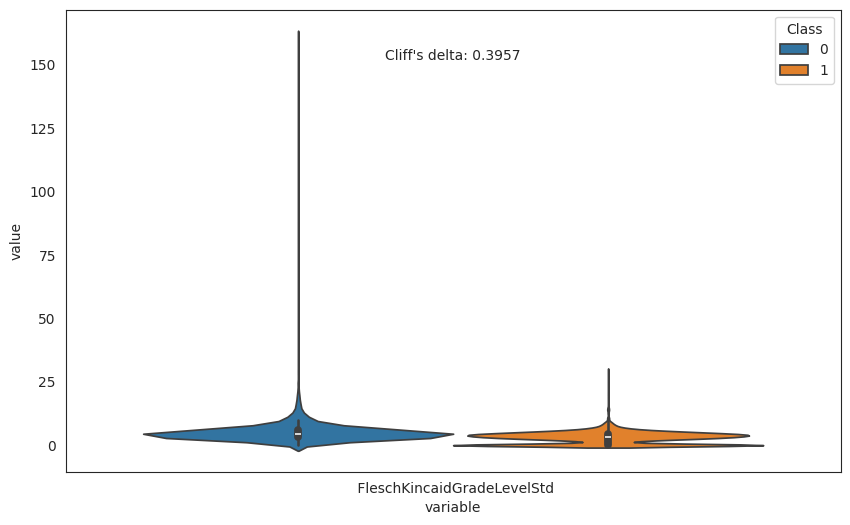

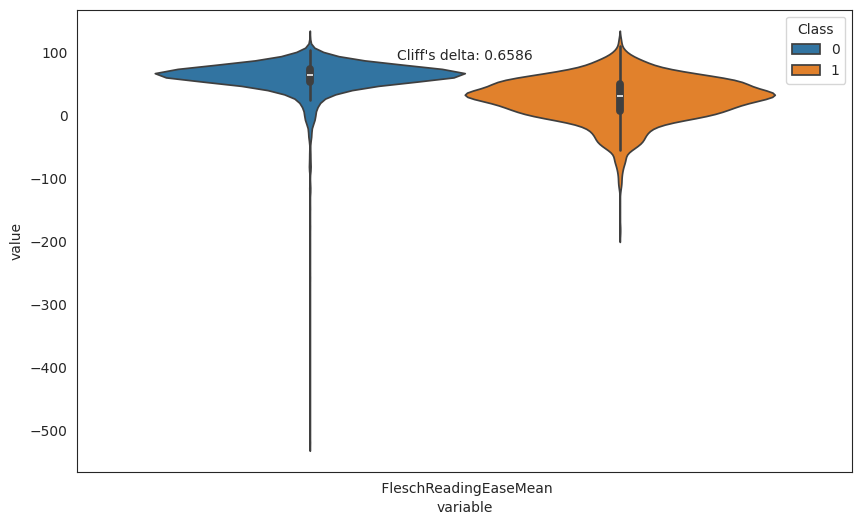

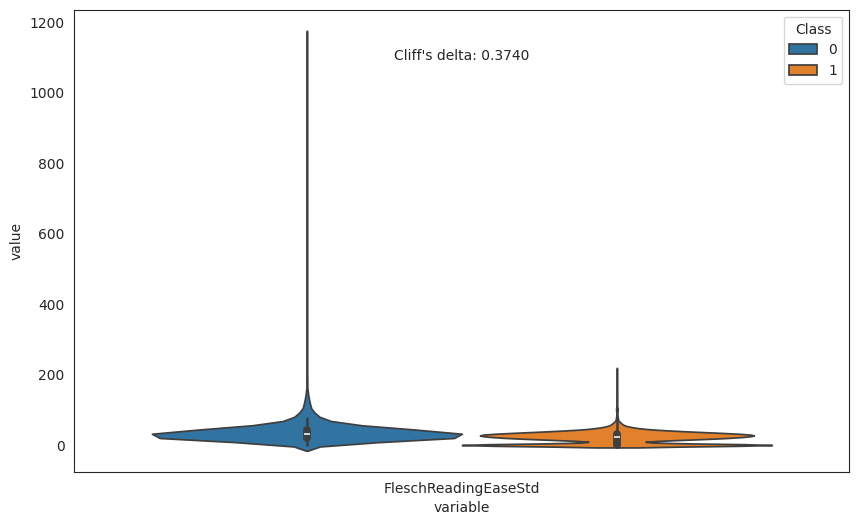

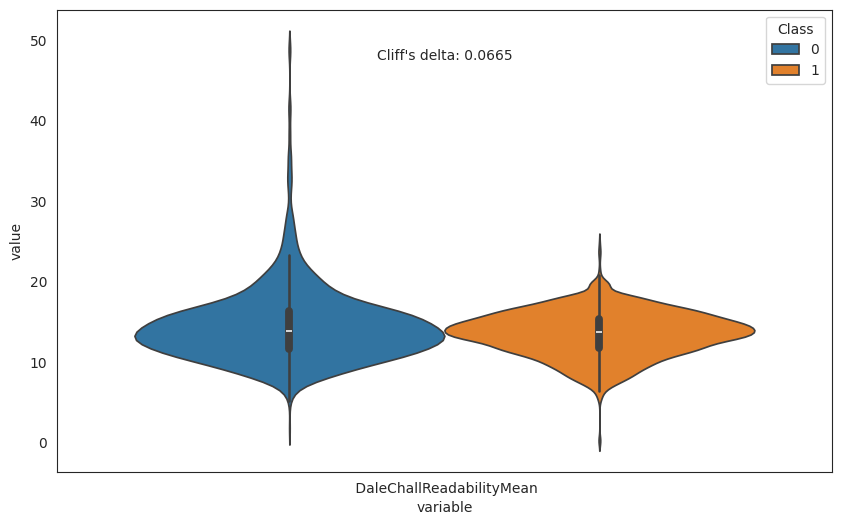

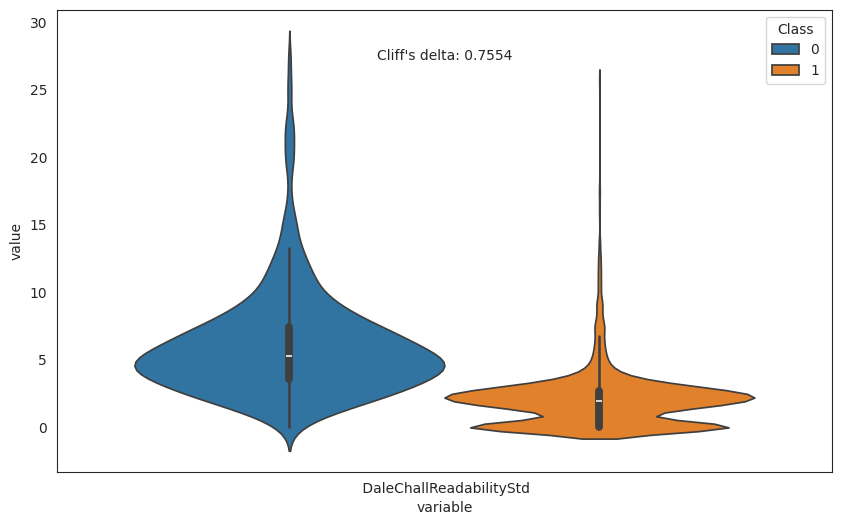

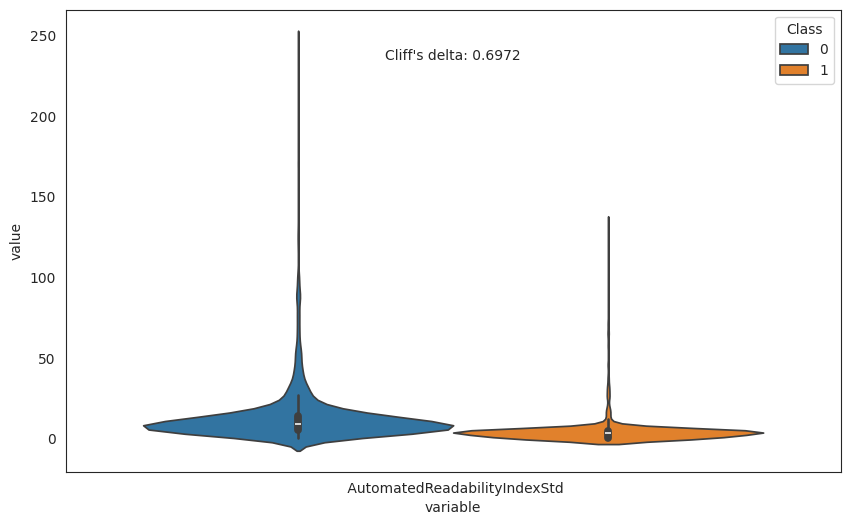

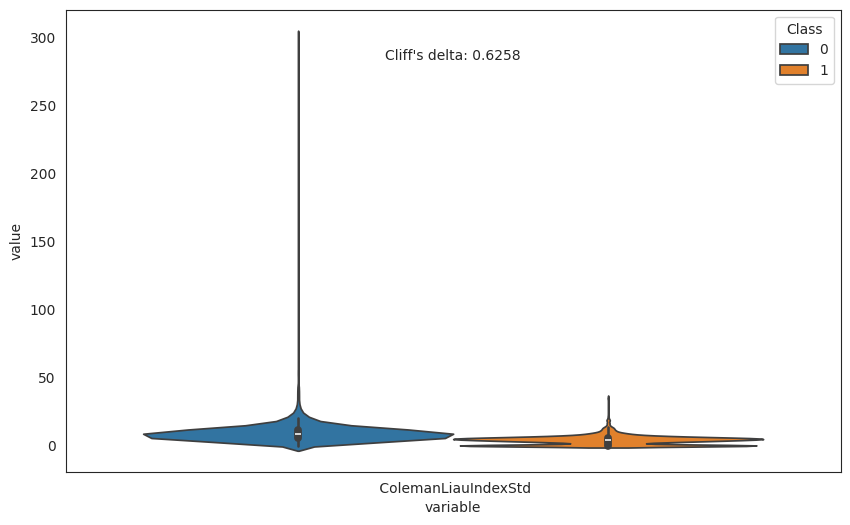

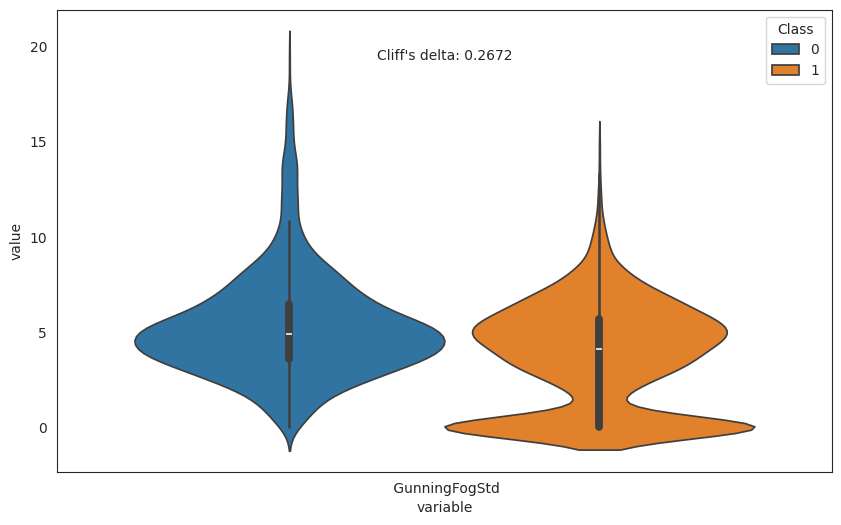

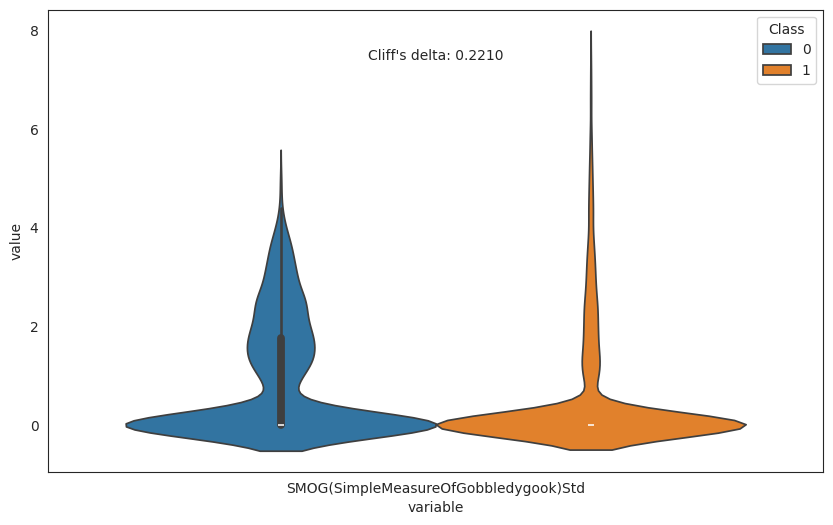

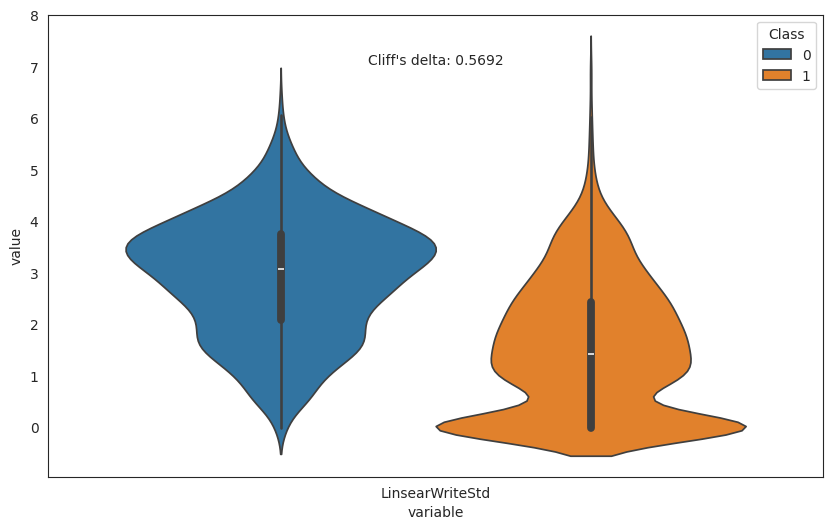

In [3]:
# Plotting the features capturing the CONSISTENCY

melted_data = pd.melt(data, id_vars=['Class'], value_vars=data.columns[1:45])
selected_features = []
sns.set_style("white")

for feature_info in significant_features:
    feature_name, _ = feature_info
    melted_data_feature = melted_data[melted_data['variable'] == feature_name]

    if melted_data_feature[melted_data_feature['Class'] == 1]['value'].mean() < melted_data_feature[melted_data_feature['Class'] == 0]['value'].mean():
        n_h = len(melted_data_feature[melted_data_feature['Class'] == 0]['value'])
        n_b = len(melted_data_feature[melted_data_feature['Class'] == 1]['value'])
        C = sum(np.sign(x - y) for x in melted_data_feature[melted_data_feature['Class'] == 0]['value'] for y in melted_data_feature[melted_data_feature['Class'] == 1]['value'])
        d = C / (n_h * n_b)

        if d < 0.33:
            effect_size_label = "Small"
        elif 0.33 <= d < 0.474:
            effect_size_label = "Medium"
        else:
            effect_size_label = "Large"

        selected_features.append((feature_name, _, d, effect_size_label))

        # figsize
        plt.figure(figsize=(10, 6))
        sns.violinplot(x='variable', y='value', hue='Class', data=melted_data_feature)
        plt.text(0.5, 0.9, f"Cliff's delta: {d:.4f}", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
        class_counts = melted_data_feature.groupby(['Class']).size().reset_index(name='Count')
        plt.xticks(rotation=0)

        for spine in plt.gca().spines.values():
            spine.set_visible(True)

        plt.savefig(f'/content/Violin_Plot_{feature_name}.png')
        plt.show()

# Save selected features to CSV file
selected_features_df = pd.DataFrame(selected_features, columns=['Feature', 'P-value', "Effect Size (Cliff's delta)", 'Effect Size Label'])
selected_features_df.to_csv('/content/ConsistencyFeatures.csv', index=False)
